In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import os

In [2]:
stoplist  = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [3]:
def data_processing(sub, field = "submission", info=False):
    file_name = "data/" + field + "_" + sub + ".csv"
    df = pd.read_csv(file_name,index_col=0)
    if info:
        print("subreddit : " + sub)
        print(df.describe())
        print(df.info())
    return df

In [4]:
pol_df = data_processing("politics", field="comment")

In [5]:
pol_df

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
0,hynym3j,AutoModerator,"\nAs a reminder, this subreddit [is for civil ...",t3_t2suj2,1,politics,t5_2cneq,t2suj2
1,hyotmts,Lunar_Deer,Americans who support Putin can get fucked.,t3_t2suj2,7055,politics,t5_2cneq,t2suj2
2,hyo3bc6,workerbee77,Bob Mueller laid out the charges that Donald T...,t3_t2suj2,3709,politics,t5_2cneq,t2suj2
3,hyo265c,bobface222,He is almost correct,t3_t2suj2,15571,politics,t5_2cneq,t2suj2
4,hyoiog1,Jacob_C,I don't think people here understand the word ...,t3_t2suj2,1582,politics,t5_2cneq,t2suj2
...,...,...,...,...,...,...,...,...
1157,ijlfys8,TheCoelacanth,It was a criminal act for him to destroy recor...,t1_ijlbxeg,20,politics,t5_2cneq,wk0sxh
1158,ijlu0sa,evil_newton,"That’s all very well, but irrelevant if he did...",t1_ijlhc7a,9,politics,t5_2cneq,wk0sxh
1159,ijlu5jf,juliet_in_yoga_pants,"Good point, llamaface.",t1_ijlu1nz,9,politics,t5_2cneq,wk0sxh
1160,ijlcy7s,Johnny_Appleweed,They’ve apparently been dating for 5 years. Th...,t1_ijlbqkz,47,politics,t5_2cneq,wk0sxh


In [17]:
raw_text = pol_df["body"].to_list()

In [18]:
type(raw_text[2])

str

In [19]:
tgt_txt = []
vocab = set()
for text in raw_text:
    try:
        segment = text.split()
        segment_text = []
        for token in segment:
            word = re.sub('[^a-zA-Z]+', '', token).lower()
            word = stemmer.stem(word)
            if word:
                if word not in stop_words:
                    vocab.add(word)
                    segment_text.append(word)
        tgt_txt.append(segment_text)
    except:
        pass
vocab = {b: a for a, b in enumerate(set(vocab))}

In [20]:
tgt_list = []
for sent in tgt_txt:
    text = ' '.join(sent)
    tgt_list.append(text)

In [21]:
full_text = ' '.join(tgt_list)

In [22]:
stopwords = set(STOPWORDS)


In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(full_text)

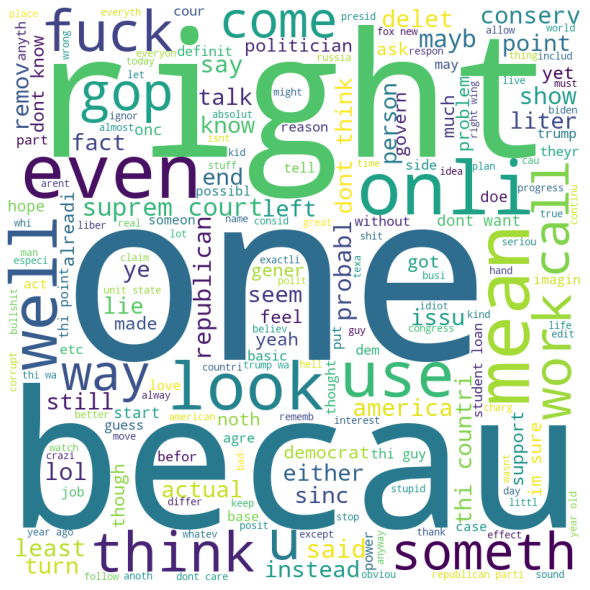

In [40]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [26]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [27]:
data = pol_df.body.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['reminder', 'subreddit', 'civil', 'discussion', 'politics', 'wiki', 'index', 'wiki_be_civil', 'general', 'courteous', 'others', 'debate', 'discuss', 'argue', 'merits', 'ideas', 'attack', 'people', 'personal', 'insults', 'shill', 'troll', 'accusations', 'hate', 'speech', 'suggestion', 'support', 'harm', 'violence', 'death']


In [28]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [29]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [30]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"would" + 0.011*"like" + 0.007*"well" + 0.005*"people" + 0.005*"even" '
  '+ 0.004*"tax" + 0.004*"get" + 0.004*"congress" + 0.004*"good" + '
  '0.004*"court"'),
 (1,
  '0.010*"like" + 0.010*"politics" + 0.009*"people" + 0.006*"please" + '
  '0.006*"republicans" + 0.005*"trump" + 0.005*"get" + 0.005*"even" + '
  '0.005*"reddit" + 0.005*"bill"'),
 (2,
  '0.012*"people" + 0.012*"right" + 0.008*"would" + 0.007*"state" + '
  '0.006*"think" + 0.006*"party" + 0.006*"one" + 0.006*"get" + 0.006*"states" '
  '+ 0.006*"even"'),
 (3,
  '0.017*"people" + 0.013*"vote" + 0.008*"like" + 0.007*"going" + '
  '0.006*"election" + 0.006*"get" + 0.006*"need" + 0.006*"democrats" + '
  '0.006*"republicans" + 0.005*"biden"'),
 (4,
  '0.026*"trump" + 0.012*"would" + 0.010*"https" + 0.009*"com" + 0.007*"www" + '
  '0.006*"years" + 0.006*"even" + 0.006*"student" + 0.005*"debt" + '
  '0.005*"know"'),
 (5,
  '0.013*"trump" + 0.011*"president" + 0.009*"deleted" + 0.008*"right" + '
  '0.008*"time" + 0.0

In [31]:
!pip install pyLDAvis
!pip install pickle

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached future-0.18.2.tar.gz (829 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=ed26290ba071f08f7fbc8a6c81bc1d1511680f1b6956769fcf720fc568c17e24
  Stored in directory: c:\users\ray\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=c57e496a45ad5341fafe4cdea0e4f74218eb744fc2b3ac6b8141e2a0fa44e269
  Stored in directory: c:\users\ray\appdata\local\pip\cache\wheels\2f\a0\d3\4030d9f80e6b3be787f19fc

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [37]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./output/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './output/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.026200 -0.007337       1        1  14.332174
2      0.048286  0.015247       2        1  13.895534
8      0.009600 -0.058206       3        1  10.879737
7     -0.071358  0.037365       4        1   9.750876
6      0.028045 -0.088380       5        1   9.661166
5     -0.027968 -0.013871       6        1   9.550665
4     -0.093917 -0.006717       7        1   8.843077
9      0.005269 -0.007945       8        1   8.651895
0     -0.004593  0.073639       9        1   8.502419
1      0.080435  0.056206      10        1   5.932460, topic_info=            Term           Freq          Total Category  logprob  loglift
101        trump  113526.000000  113526.000000  Default  30.0000  30.0000
2272     deleted   15828.000000   15828.000000  Default  29.0000  29.0000
35         https   39145.000000   39145.000000  Default  28.0000  28.0000
465    president   30949.000000   30949.000000  Default  27.0000  27.0000
178         like  138143.000000  138143.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
1052      things    3494.466231   29525.009932  Topic10  -5.6339   0.6907
74       support    2997.791745   19009.003432  Topic10  -5.7872   0.9777
913   government    3331.493229   32912.923638  Topic10  -5.6817   0.5343
67           see    3493.270086   44631.533885  Topic10  -5.6343   0.2771
277         time    3100.871225   60473.884204  Topic10  -5.7534  -0.1458

[1055 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
2711       1  0.027370  abortion
2711       2  0.355242  abortion
2711       3  0.011048  abortion
2711       4  0.061394  abortion
2711       5  0.083114  abortion
...      ...       ...       ...
1183       9  0.033869  zelensky
1183      10  0.003985  zelensky
18779      4  0.007665    zodiac
18779      5  0.981130    zodiac
18779      9  0.007665    zodiac

[4878 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 8, 7, 6, 5, 10, 1, 2])

In [5]:
df = pd.read_csv("data/user_networks/neutralpolitics_strong.csv")

In [6]:
df.head()

,Unnamed: 0,username,avg_comment_similarity,avg_comment_time_interval,avg_reply_speed
0,0,Lord-Sprinkles,0.629900,0 days 01:40:01,0 0 days 01:44:18\n1 0 days 01:50:04\n2 ...
1,1,ninernetneepneep,0.617013,0 days 05:21:57,0 0 days 04:50:42\n1 61 days 06:58:51\n...
2,2,Imdatingstaceysmom,0.520881,5 days 05:15:53,0 0 days 00:05:24\n1 0 days 04:15:37\n2 ...
3,3,dirtyALEK,0.581514,2 days 13:50:40,0 0 days 08:55:20\n1 0 days 00:03:44\n2 ...
4,4,AlpacaWarMachine,0.471238,4 days 05:27:17,0 0 days 00:51:50\n1 0 days 00:17:46\n2 ...
